<a href="https://colab.research.google.com/github/ManJ-PC/Psychosis-AI/blob/master/KMeansAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML algorithms are
categorized into 3 main categories:

*   Supervised   (class label or a target variable present)
*   Unsupervised (you have is set of features you don't know about
your target variable or a class label using this data set we try to identify the
underlying structure in that data  or we sometimes try to find the clusters
in that data
and we can make useful predictions out
of it k
means is a very popular clustering
algorithm)
*   Reinforcement 

Learning







In [2]:
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler 2 rectangles input below

wages = {'Name': ['Rob','Michael','Mohan','Ismail'],
         'Age': [27, 29, 29, 28],
        'Price': [22000,25000,27000,35000]
        }

tab = pd.DataFrame(wages, columns = ['Name','Age', 'Price'])


In [3]:
tab

,Name,Age,Price
0,Rob,27,22000
1,Michael,29,25000
2,Mohan,29,27000
3,Ismail,28,35000


In [4]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,Age,Income($)
Name,,
Rob,27,70000
Michael,29,90000
Mohan,29,61000
Ismail,28,60000
Kory,42,150000


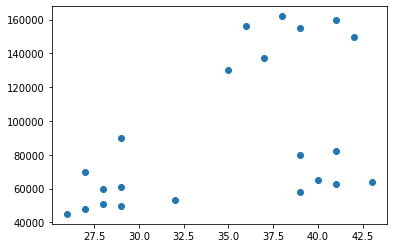

In [6]:
plt.scatter(df['Age'],df['Income($)'])

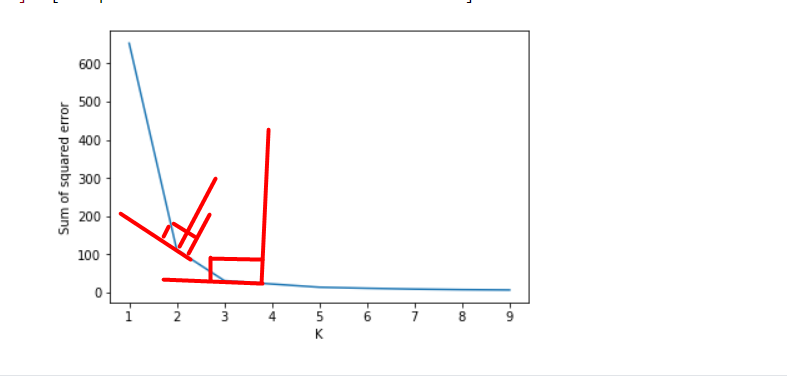

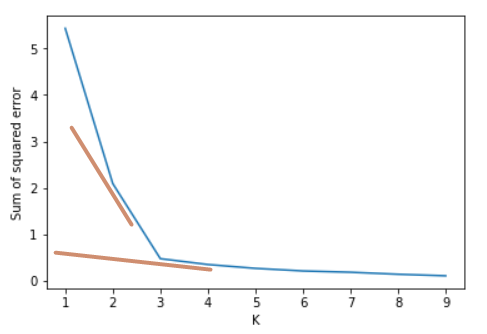
  

In [7]:
km = KMeans(n_clusters=3) #esta imagem não corresponde..
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['cluster']=y_predicted
df.head(25)

,Age,Income($),cluster
Name,,,
Rob,27,70000,2
Michael,29,90000,2
Mohan,29,61000,0
Ismail,28,60000,0
Kory,42,150000,1
Gautam,39,155000,1
David,41,160000,1
Andrea,38,162000,1
Brad,36,156000,1


In [10]:

km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

No handles with labels found to put in legend.


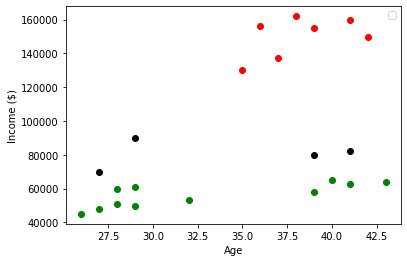

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color ='green')
plt.scatter(df2.Age,df2['Income($)'], color = 'red')
plt.scatter(df3.Age,df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [12]:
'''so when you don't scale your features
properly
properly you might get into this problem
that's why we need to do some
pre-processing
and use min max killer to scale
these two features and then only we can
run our algorithm
all right so we are going to use min
max scalar '''

scaler = MinMaxScaler()

#scale the Income($)
scaler.fit(df[['Income($)']]) # make the scale 0 to 1 
#df['Income($)'] = scaler.transform(df['Income($)'])
df['Income($)'] = scaler.transform(df[['Income($)']])

#Scale the age
scaler.fit(df[['Age']]) #
df['Age'] = scaler.transform(df[['Age']])

df

,Age,Income($),cluster
Name,,,
Rob,0.058824,0.213675,2
Michael,0.176471,0.384615,2
Mohan,0.176471,0.136752,0
Ismail,0.117647,0.128205,0
Kory,0.941176,0.897436,1
Gautam,0.764706,0.940171,1
David,0.882353,0.982906,1
Andrea,0.705882,1.000000,1
Brad,0.588235,0.948718,1


In [13]:
km = KMeans(n_clusters=3) # e agora a escalar de outra forma...!!
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [14]:
df['cluster'] = y_predicted
#df.drop('cluter',axis='columns',inplace=True) No Vídeo ele enganou-se e criou um, inicialmente... , chamado cluter e criou com nome certo e este foi à vida
df

,Age,Income($),cluster
Name,,,
Rob,0.058824,0.213675,0
Michael,0.176471,0.384615,0
Mohan,0.176471,0.136752,0
Ismail,0.117647,0.128205,0
Kory,0.941176,0.897436,1
Gautam,0.764706,0.940171,1
David,0.882353,0.982906,1
Andrea,0.705882,1.000000,1
Brad,0.588235,0.948718,1


In [15]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

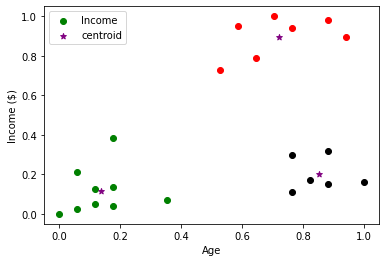

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color ='green', label="Income")
plt.scatter(df2.Age,df2['Income($)'], color = 'red')
plt.scatter(df3.Age,df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')#  added this After

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [17]:

km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [18]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_) #gives the sum of square errors and that error we want to just append it to our array

In [19]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.21066678488010523,
 0.17681044133887713,
 0.13265419827245162,
 0.10907864282306066]

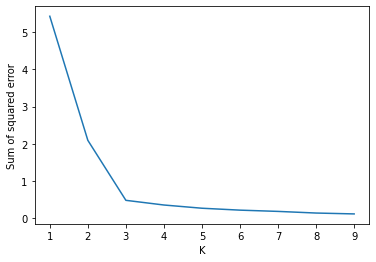

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

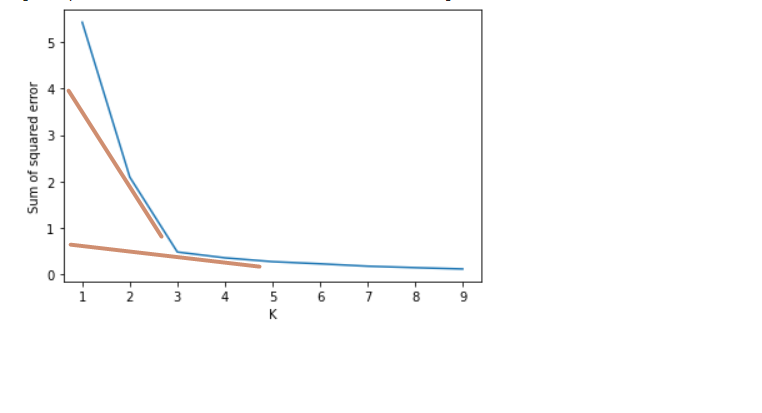

In [25]:
list(range(5,10))

[5, 6, 7, 8, 9]